In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [ ]:
os.getcwd() #to check current directory 

Read the CSV file into a pandas dataframe

In [3]:
df = pd.read_csv('/data/data.csv')
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0
...,...,...,...,...
144369,08/31/2021 07:00:00 PM,139.0,52.0,87.0
144370,08/31/2021 08:00:00 PM,95.0,38.0,57.0
144371,08/31/2021 09:00:00 PM,48.0,26.0,22.0
144372,08/31/2021 10:00:00 PM,24.0,15.0,9.0


Add columns to the dataframe containing: The total (East + West) bicycle count

In [4]:
sum_column = df["Fremont Bridge East Sidewalk"] + df["Fremont Bridge West Sidewalk"]
df["Total bicycle count"] = sum_column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144374 entries, 0 to 144373
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          144374 non-null  object 
 1   Fremont Bridge Total          144352 non-null  float64
 2   Fremont Bridge East Sidewalk  144352 non-null  float64
 3   Fremont Bridge West Sidewalk  144352 non-null  float64
 4   Total bicycle count           144352 non-null  float64
dtypes: float64(4), object(1)
memory usage: 5.5+ MB


The “date” field is a string coded as “yyyy-mm-dd Thh” where “yyyy” is the year, “mm” is the month, “dd” is the day, and “hh” is the hour.

In [5]:
#Converting the string date to a python DateTime object with formatting.
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144374 entries, 0 to 144373
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date                          144374 non-null  datetime64[ns]
 1   Fremont Bridge Total          144352 non-null  float64       
 2   Fremont Bridge East Sidewalk  144352 non-null  float64       
 3   Fremont Bridge West Sidewalk  144352 non-null  float64       
 4   Total bicycle count           144352 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.5 MB


In [7]:
df['Date']

0        2019-11-01 00:00:00
1        2019-11-01 01:00:00
2        2019-11-01 02:00:00
3        2019-11-01 03:00:00
4        2019-11-01 04:00:00
                 ...        
144369   2021-08-31 19:00:00
144370   2021-08-31 20:00:00
144371   2021-08-31 21:00:00
144372   2021-08-31 22:00:00
144373   2021-08-31 23:00:00
Name: Date, Length: 144374, dtype: datetime64[ns]

Add columns to the dataframe containing:
The hour of the day,
The year

In [8]:
df['Date'].dt.date
df['Year'] = pd.DatetimeIndex(df['Date']).year #or df['year'] = df['Date'].dt.year
df['Hour'] = df['Date'].dt.hour
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total bicycle count,Year,Hour
0,2019-11-01 00:00:00,12.0,7.0,5.0,12.0,2019,0
1,2019-11-01 01:00:00,7.0,0.0,7.0,7.0,2019,1
2,2019-11-01 02:00:00,1.0,0.0,1.0,1.0,2019,2
3,2019-11-01 03:00:00,6.0,6.0,0.0,6.0,2019,3
4,2019-11-01 04:00:00,6.0,5.0,1.0,6.0,2019,4


Create a dataframe with the subset of data from the year 2016

In [9]:
df1 = df[df['Year'] == 2016]
df1

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total bicycle count,Year,Hour
34706,2016-01-01 00:00:00,18.0,9.0,9.0,18.0,2016,0
34707,2016-01-01 01:00:00,15.0,3.0,12.0,15.0,2016,1
34708,2016-01-01 02:00:00,11.0,6.0,5.0,11.0,2016,2
34709,2016-01-01 03:00:00,7.0,1.0,6.0,7.0,2016,3
34710,2016-01-01 04:00:00,2.0,0.0,2.0,2.0,2016,4
...,...,...,...,...,...,...,...
99217,2016-12-31 19:00:00,10.0,6.0,4.0,10.0,2016,19
99218,2016-12-31 20:00:00,9.0,3.0,6.0,9.0,2016,20
99219,2016-12-31 21:00:00,10.0,4.0,6.0,10.0,2016,21
99220,2016-12-31 22:00:00,15.0,7.0,8.0,15.0,2016,22


Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis)

In [10]:
H1 = df.drop(labels=['Fremont Bridge Total', 'Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk', 'Year'], axis = 1)
H1 = H1.groupby(['Hour']).sum()
H1 = H1.reset_index()
H1

,Hour,Total bicycle count
0,0,66362.0
1,1,35045.0
2,2,22937.0
3,3,16972.0
4,4,38541.0
5,5,150693.0
6,6,525529.0
7,7,1318589.0
8,8,1865231.0
9,9,1101034.0


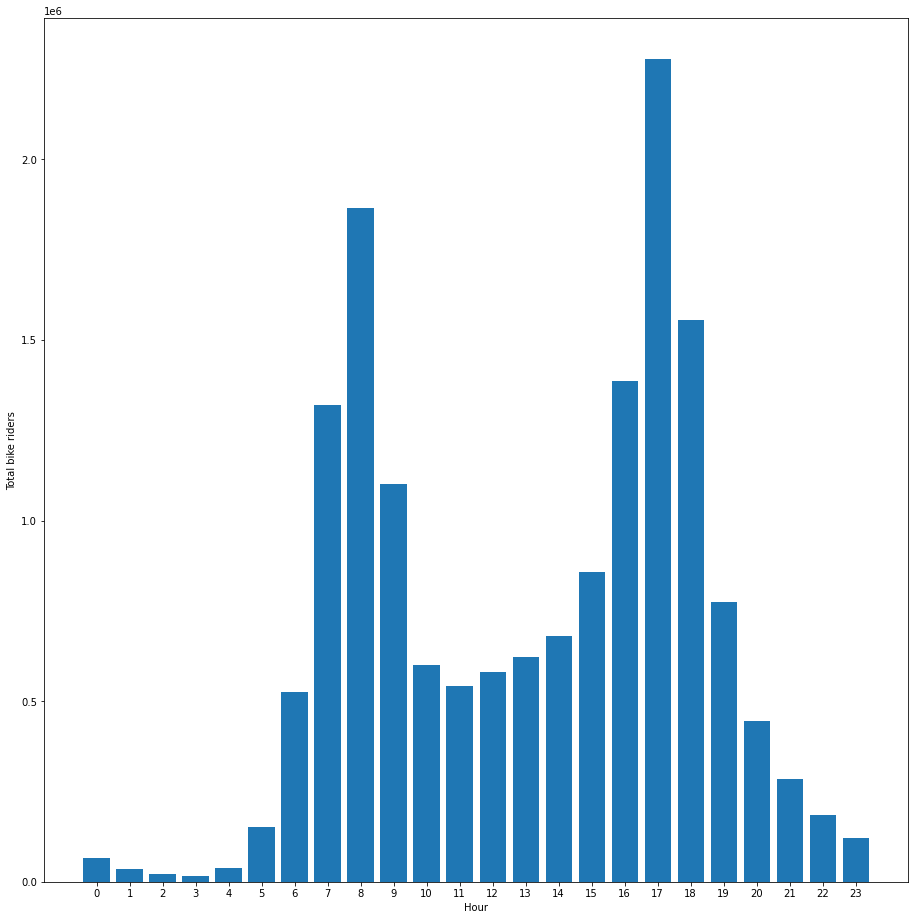

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,3])
ax.bar(H1['Hour'],H1['Total bicycle count'])
plt.xticks(H1['Hour'])
plt.xlabel("Hour")
plt.ylabel("Total bike riders")
plt.show()

Use pandas to determine what is (on average) the busiest hour of the day

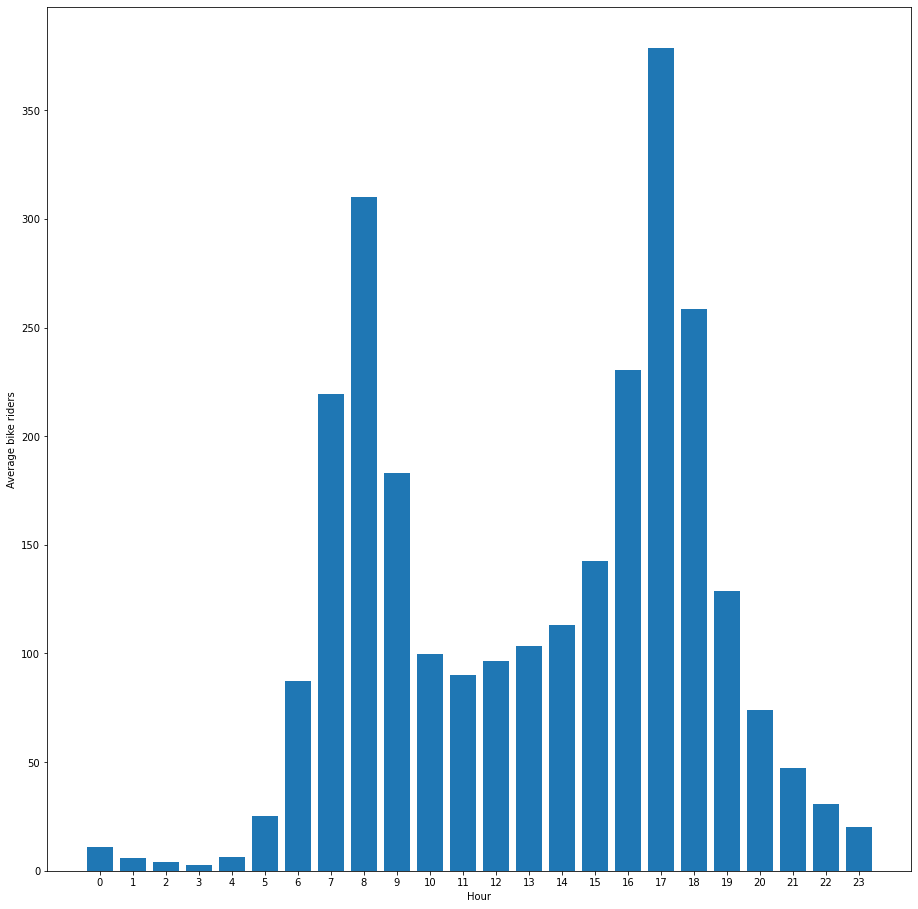

In [12]:
b = df.drop(labels=['Fremont Bridge Total', 'Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk', 'Year'], 
                 axis = 1)
b = b.groupby(['Hour']).mean()
b = b.reset_index()
fig = plt.figure()
ax = fig.add_axes([0,0,2,3])
ax.bar(b['Hour'],b['Total bicycle count'])
plt.xticks(b['Hour'])
plt.xlabel("Hour")
plt.ylabel("Average bike riders")
plt.show()

From the above bar graph, on average 5PM is the busiest hour